In [12]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel
import cartopy as cp
# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM0/wrfout_d01_2020-06-27_00:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM1/wrfout_d01_2020-06-27_00:00:00")
ncfile2 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM2/wrfout_d01_2020-06-27_00:00:00")
ncfile3 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM3/wrfout_d01_2020-06-27_00:00:00")

print("Variables in the WRF file:")
for var_name in ncfile1.variables:
    print(var_name)


#import numpy as np
#unique_lu = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
#print("Unique LU_INDEX values:", unique_lu)

Variables in the WRF file:
Times
XLAT
XLONG
LU_INDEX
ZNU
ZNW
ZS
DZS
VAR_SSO
BATHYMETRY_FLAG
U
V
W
PH
PHB
T
THM
HFX_FORCE
LH_FORCE
TSK_FORCE
HFX_FORCE_TEND
LH_FORCE_TEND
TSK_FORCE_TEND
MU
MUB
NEST_POS
P
PB
FNM
FNP
RDNW
RDN
DNW
DN
CFN
CFN1
THIS_IS_AN_IDEAL_RUN
P_HYD
Q2
T2
TH2
PSFC
U10
V10
RDX
RDY
AREA2D
DX2D
RESM
ZETATOP
CF1
CF2
CF3
ITIMESTEP
XTIME
QVAPOR
QCLOUD
QRAIN
QICE
QSNOW
QGRAUP
QNICE
QNRAIN
SHDMAX
SHDMIN
SNOALB
TSLB
SMOIS
SH2O
SMCREL
SEAICE
XICEM
SFROFF
UDROFF
IVGTYP
ISLTYP
VEGFRA
GRDFLX
ACGRDFLX
ACSNOM
SNOW
SNOWH
CANWAT
SSTSK
WATER_DEPTH
COSZEN
LAI
U10E
V10E
VAR
TKE_PBL
EL_PBL
O3_GFS_DU
MAPFAC_M
MAPFAC_U
MAPFAC_V
MAPFAC_MX
MAPFAC_MY
MAPFAC_UX
MAPFAC_UY
MAPFAC_VX
MF_VX_INV
MAPFAC_VY
F
E
SINALPHA
COSALPHA
HGT
TSK
P_TOP
GOT_VAR_SSO
T00
P00
TLP
TISO
TLP_STRAT
P_STRAT
MAX_MSFTX
MAX_MSFTY
RAINC
RAINSH
RAINNC
SNOWNC
GRAUPELNC
HAILNC
CLDFRA
SWDOWN
GLW
SWNORM
ACSWUPT
ACSWUPTC
ACSWDNT
ACSWDNTC
ACSWUPB
ACSWUPBC
ACSWDNB
ACSWDNBC
ACLWUPT
ACLWUPTC
ACLWDNT
ACLWDNTC
ACLWUPB
ACLWUPBC
ACLWDNB
ACL

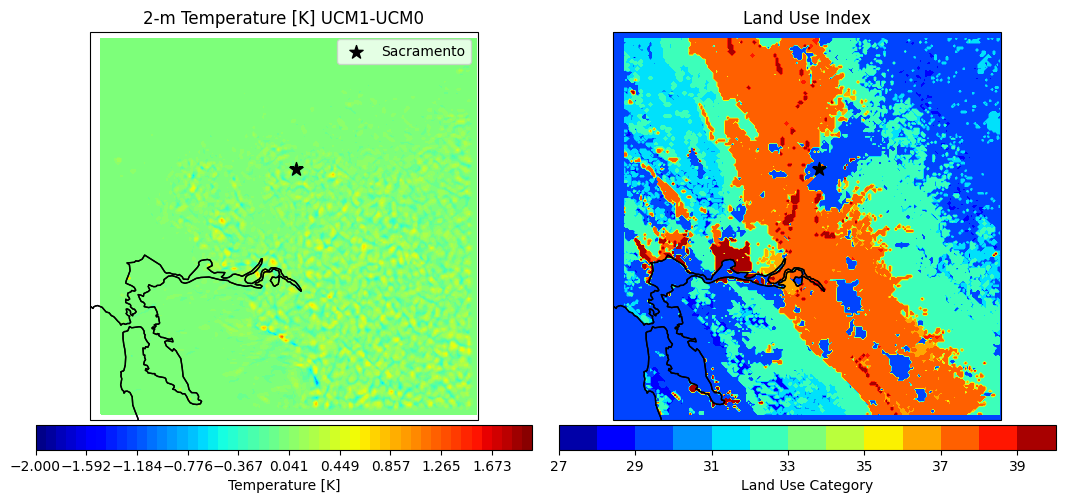

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cp
from wrf import getvar, to_np, get_cartopy, latlon_coords

# Get WRF variables
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2") 
Var2 = getvar(ncfile1, "LU_INDEX")

# Get projection and lat/lon
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)

levels = np.linspace(-2, 2, 50)

# Define plotting region
center_lon, center_lat = -121.49, 38.58
#lon_min, lon_max = center_lon - 0.35, center_lon + 0.35
#lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
lon_min, lon_max = center_lon - .3, center_lon + .3
lat_min, lat_max = center_lat - .2, center_lat + 0.2

# Create figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(18, 6))

### --- Plot 1: Temperature difference--- ###
ax0.set_title("2-m Temperature [K] UCM1-UCM0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1-Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels)
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(center_lon, center_lat, color='black', marker='*',s=100,label="Sacramento", transform=cp.crs.PlateCarree())
ax0.legend()
# Horizontal colorbar under ax0
cbar0 = fig.colorbar(contour0, ax=ax0, orientation='horizontal', pad=0.01, shrink=0.57)
cbar0.set_label("Temperature [K]")

### --- Plot 2: LU_INDEX --- ###
ax1.set_title("Land Use Index")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=range(27,41))
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(center_lon, center_lat, color='black', marker='*', s=100, label="Sacramento", transform=cp.crs.PlateCarree())
cbar1 = fig.colorbar(contour1, ax=ax1, orientation='horizontal', pad=0.01, shrink=0.57)
cbar1.set_label("Land Use Category")

plt.show()


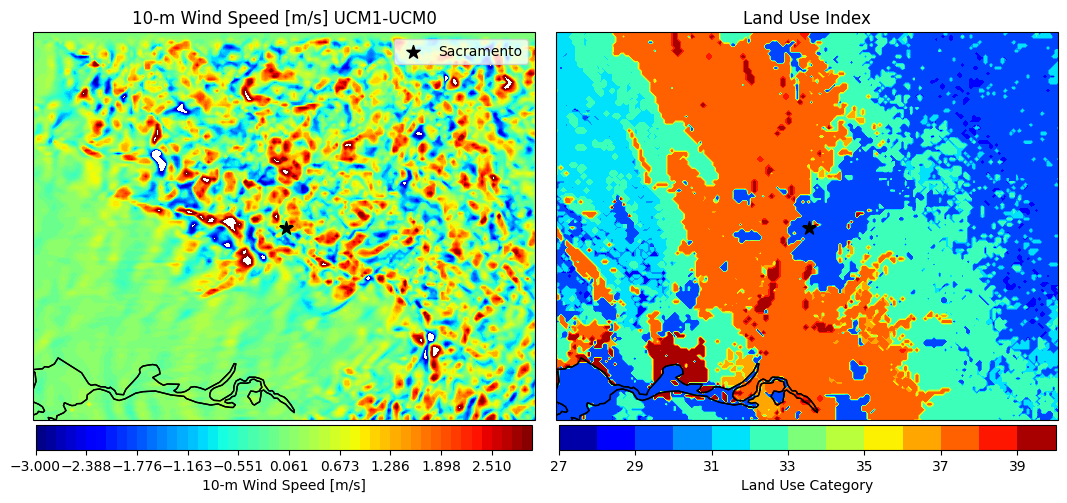

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cp
from wrf import getvar, to_np, get_cartopy, latlon_coords

# Get WRF variables
Var0 = getvar(ncfile0, "wspd10")
Var1 = getvar(ncfile1, "wspd10") 
Var2 = getvar(ncfile1, "LU_INDEX")

# Get projection and lat/lon
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)

levels = np.linspace(-3, 3, 50)

# Define plotting region
center_lon, center_lat = -121.49, 38.58
#lon_min, lon_max = center_lon - 0.35, center_lon + 0.35
#lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
lon_min, lon_max = center_lon - 1, center_lon + 1
lat_min, lat_max = center_lat - .6, center_lat + 0.6

# Create figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(18, 6))

### --- Plot 1: Temperature difference--- ###
ax0.set_title("10-m Wind Speed [m/s] UCM1-UCM0")
ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1-Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels)
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(center_lon, center_lat, color='black', marker='*',s=100,label="Sacramento", transform=cp.crs.PlateCarree())
ax0.legend()
# Horizontal colorbar under ax0
cbar0 = fig.colorbar(contour0, ax=ax0, orientation='horizontal', pad=0.01, shrink=0.57)
cbar0.set_label("10-m Wind Speed [m/s]")

### --- Plot 2: LU_INDEX --- ###
ax1.set_title("Land Use Index")
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=range(27,41))
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(center_lon, center_lat, color='black', marker='*', s=100, label="Sacramento", transform=cp.crs.PlateCarree())
cbar1 = fig.colorbar(contour1, ax=ax1, orientation='horizontal', pad=0.01, shrink=0.57)
cbar1.set_label("Land Use Category")

plt.show()


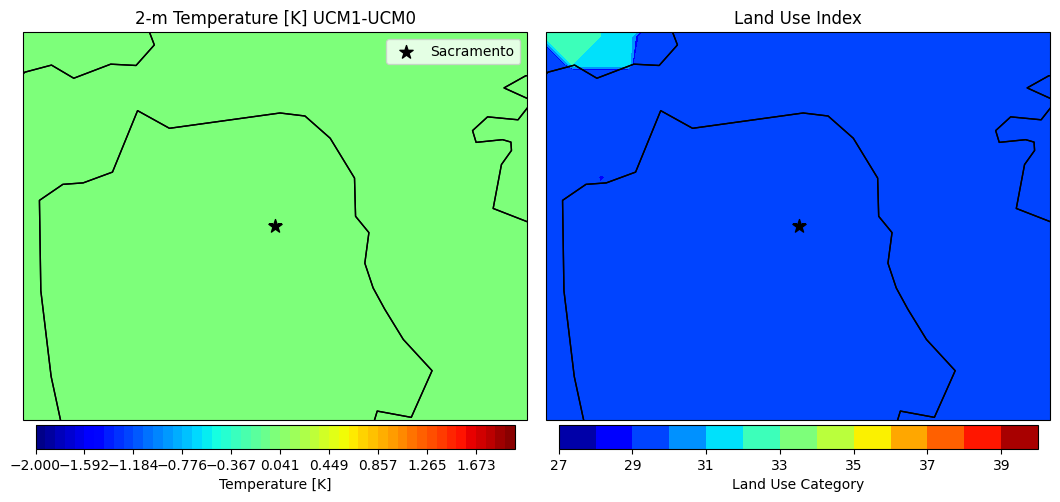

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cp
from wrf import getvar, to_np, get_cartopy, latlon_coords

# Get WRF variables
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2") 
Var2 = getvar(ncfile1, "LU_INDEX")

# Get projection and lat/lon
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)

levels = np.linspace(-2, 2, 50)

# Define plotting region
center_lon, center_lat = -122.4194, 37.7749
#lon_min, lon_max = center_lon - 0.35, center_lon + 0.35
#lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
lon_min, lon_max = center_lon - .1, center_lon + .1
lat_min, lat_max = center_lat - .06, center_lat + 0.06

# Create figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(18, 6))

### --- Plot 1: Temperature difference--- ###
ax0.set_title("2-m Temperature [K] UCM1-UCM0")
ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1-Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels)
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(center_lon, center_lat, color='black', marker='*',s=100,label="Sacramento", transform=cp.crs.PlateCarree())
ax0.legend()
# Horizontal colorbar under ax0
cbar0 = fig.colorbar(contour0, ax=ax0, orientation='horizontal', pad=0.01, shrink=0.55)
cbar0.set_label("Temperature [K]")

### --- Plot 2: LU_INDEX --- ###
ax1.set_title("Land Use Index")
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=range(27,41))
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(center_lon, center_lat, color='black', marker='*', s=100, label="Sacramento", transform=cp.crs.PlateCarree())
cbar1 = fig.colorbar(contour1, ax=ax1, orientation='horizontal', pad=0.01, shrink=0.55)
cbar1.set_label("Land Use Category")

plt.show()


### 2-meter Temperature for all 4 sf_urban_physics models (0, 1, 2, 3).
Referenced here. https://www2.mmm.ucar.edu/wrf/users/wrf_users_guide/build/html/physics.html<br>
Urban Effects:<br>
I ran the coarse domain 5km 300x300 grid centered arounded Turlock, CA.<br>
Then I used real->ndown->wrf to run the fine domain with 1km 201x201 grid centered around Sacrmento with sf_urban_physics=0 were changed to 1,2,3.<br>
The ncfile names above correspond to each of the UCM.<br>

### The code below creates a colormap of the temperature as function of longitude and latitude.
Coastline, Stateline and star for Sacramento as a reference point.

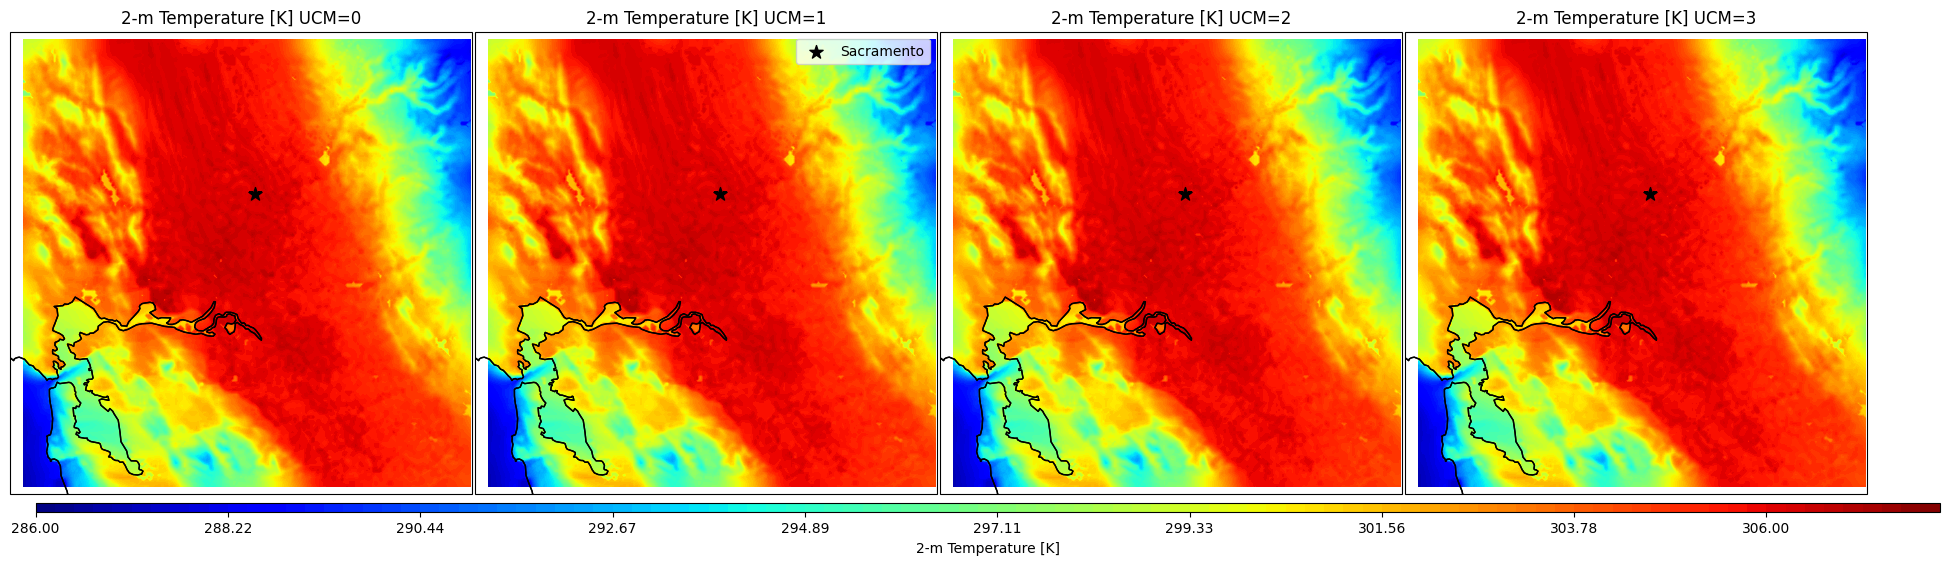

In [5]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var2).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var2).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("2-m Temperature [K] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("2-m Temperature [K] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
ax1.legend()

#  contour plot for UCM=2
ax2.set_title("2-m Temperature [K] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("2-m Temperature [K] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("2-m Temperature [K]")

plt.show()

The Figure above are colormaps of 2-m temperature around Sacramento CA for the date specified in the input files.<br>
The results looks physically sensible where the central valley temperature is 10 degrees C hotter than the coastal region. <br>
### Statistical Histogramming of the Map
To statistically compare the different UCMs, histogram of the temperature were made, where the y-axis is the number of pixel with a particulat temperature on the map.<br>

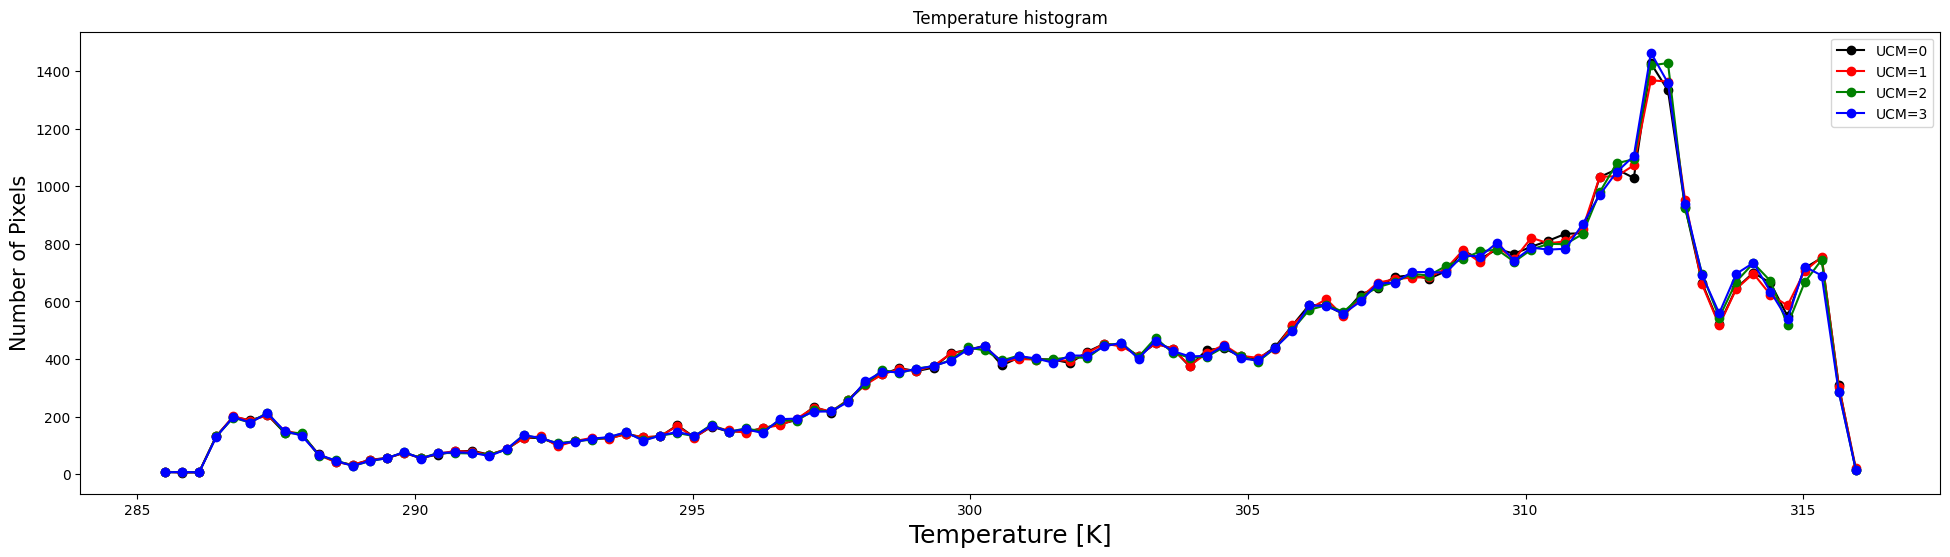

In [6]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Setting up the figure
plt.figure(figsize=(24, 6))
plt.title(f"Temperature histogram")
plt.xlabel("Temperature [K]", fontsize=18)
plt.ylabel("Number of Pixels", fontsize=15)

# Histogramming
count0, bin_edges = np.histogram(to_np(Var0).flatten(), bins=100)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
plt.plot(bin_centers, count0, color='k', marker='o', linestyle='-', label="UCM=0")

# Histogramming
count1, _ = np.histogram(to_np(Var1).flatten(), bins=bin_edges)
plt.plot(bin_centers, count1, color='r', marker='o', linestyle='-', label="UCM=1")


# Histogramming
count2, _ = np.histogram(to_np(Var2).flatten(), bins=bin_edges)
plt.plot(bin_centers, count2, color='g', marker='o', linestyle='-', label="UCM=2")

# Histogramming
count3, _ = np.histogram(to_np(Var3).flatten(), bins=bin_edges)
plt.plot(bin_centers, count3, color='b', marker='o', linestyle='-', label="UCM=3")

# Plotting Options
#plt.yscale('log')
#plt.ylim(3000,250_000)
plt.legend()
plt.show()

The plot above seems to be dominated by the lower temperature tail. I think we should focus on the high temperature region in the valley. <br>
I am going to remake this histogram from T > 300Konly.<br>
### Statistical Histogramming of the Map T > 300 K 

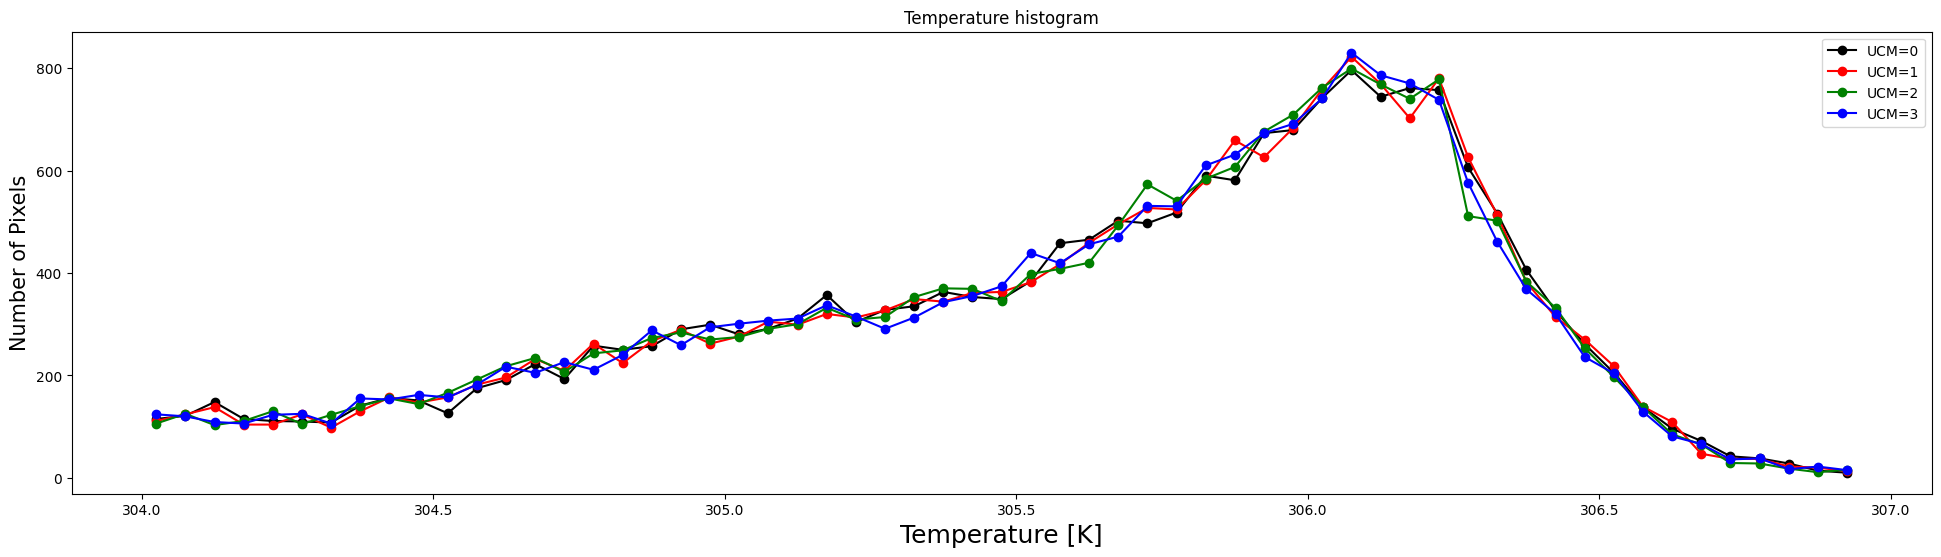

In [9]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Setting up the figure
plt.figure(figsize=(24, 6))
plt.title(f"Temperature histogram")
plt.xlabel("Temperature [K]", fontsize=18)
plt.ylabel("Number of Pixels", fontsize=15)

# Histogramming
count0, bin_edges = np.histogram(to_np(Var0).flatten(), bins=np.arange(304,307,0.05))
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
plt.plot(bin_centers, count0, color='k', marker='o', linestyle='-', label="UCM=0")

# Histogramming
count1, _ = np.histogram(to_np(Var1).flatten(), bins=bin_edges)
plt.plot(bin_centers, count1, color='r', marker='o', linestyle='-', label="UCM=1")


# Histogramming
count2, _ = np.histogram(to_np(Var2).flatten(), bins=bin_edges)
plt.plot(bin_centers, count2, color='g', marker='o', linestyle='-', label="UCM=2")

# Histogramming
count3, _ = np.histogram(to_np(Var3).flatten(), bins=bin_edges)
plt.plot(bin_centers, count3, color='b', marker='o', linestyle='-', label="UCM=3")

# Plotting Options
#plt.yscale('log')
#plt.ylim(3000,250_000)
plt.legend()
plt.show()

### 2-m Temperature Difference between the Models
We can also subtract the colormaps so see if there's a difference between them at a particular long/lat.

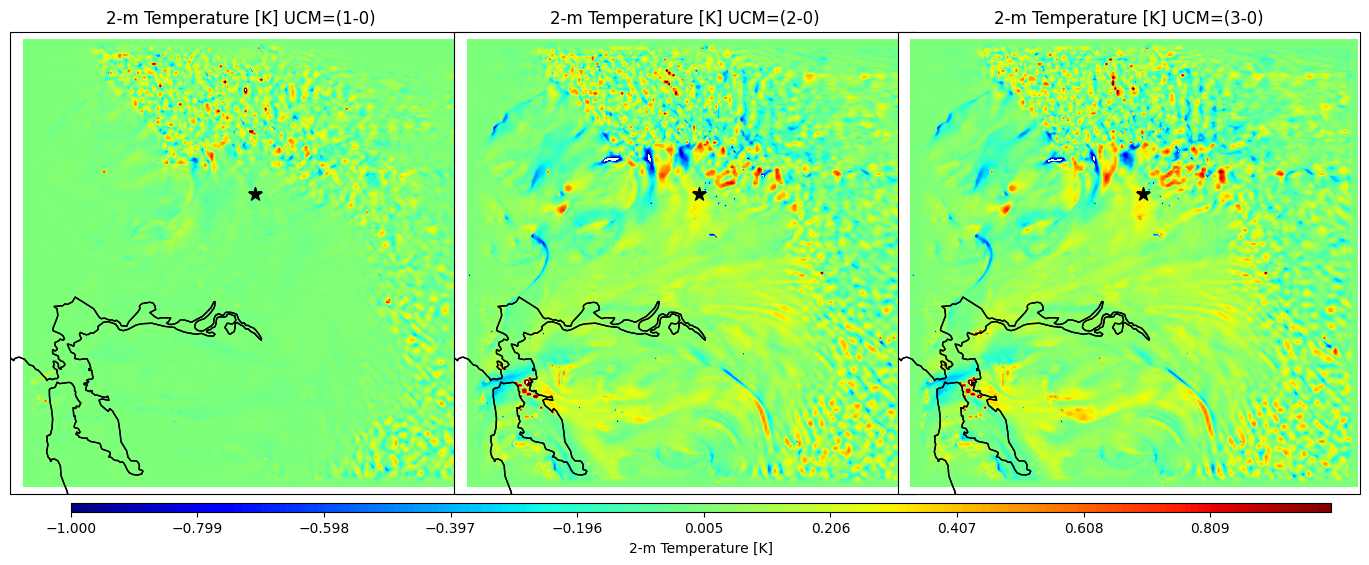

In [13]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-1, 1, 200)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("2-m Temperature [K] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("2-m Temperature [K] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("2-m Temperature [K] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("2-m Temperature [K]")

plt.show()

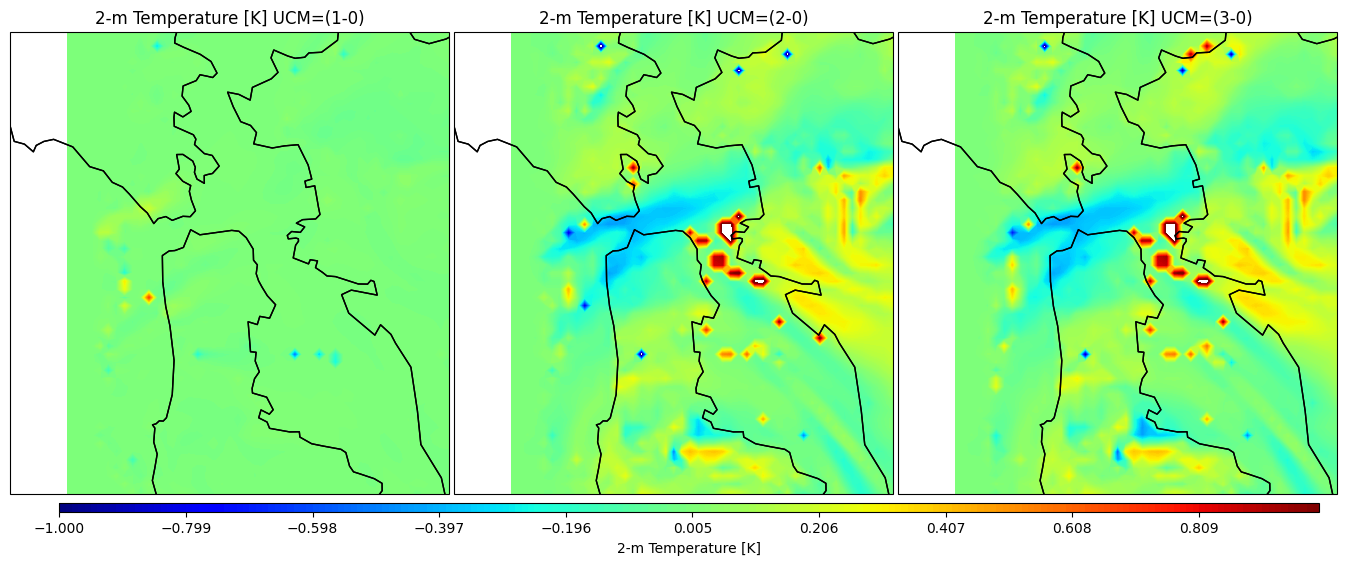

In [14]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-1, 1, 200)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("2-m Temperature [K] UCM=(1-0)")
#ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -122.4194, 37.7749
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("2-m Temperature [K] UCM=(2-0)")
#ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("2-m Temperature [K] UCM=(3-0)")
#ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("2-m Temperature [K]")

plt.show()

The figure above shows the difference between the UCM models. UCM=0 is the common baseline. So the code does UCM1-UCM0, UCM2-UCM0, UCM3-UCM0.<br>
We can see that the temperature between the models are the same over most regions. There are a few area right after the San Joaquin Delta that have "rings" where the modes differs.<br>
It is odd that the Urban canopy seems to change the area around the Delta instead of around major cities.<br>

### Plot of Pressure at the Surface (PSFC)

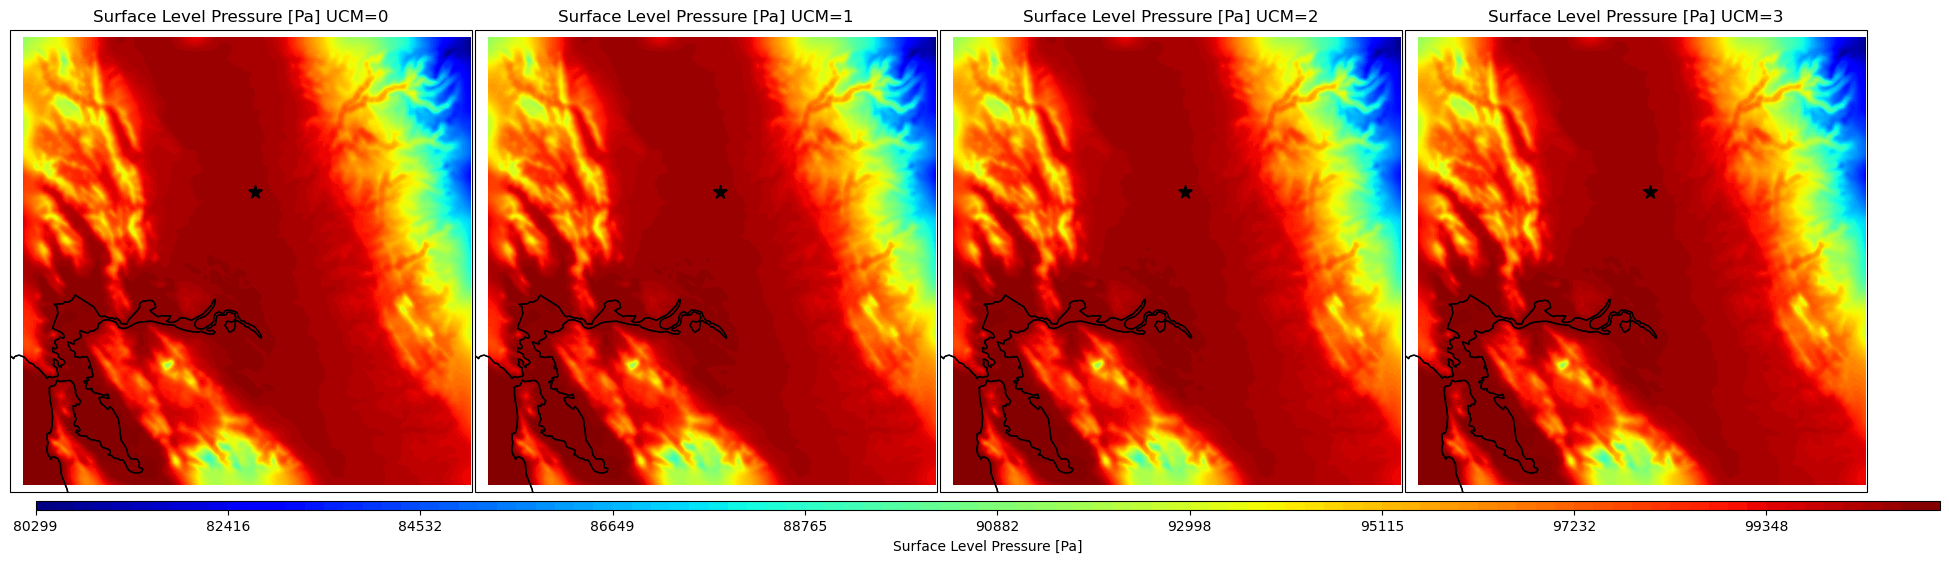

In [5]:
Var0 = getvar(ncfile0, "PSFC")
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
Var3 = getvar(ncfile3, "PSFC")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Surface Level Pressure [Pa] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Surface Level Pressure [Pa] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Surface Level Pressure [Pa] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Surface Level Pressure [Pa] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

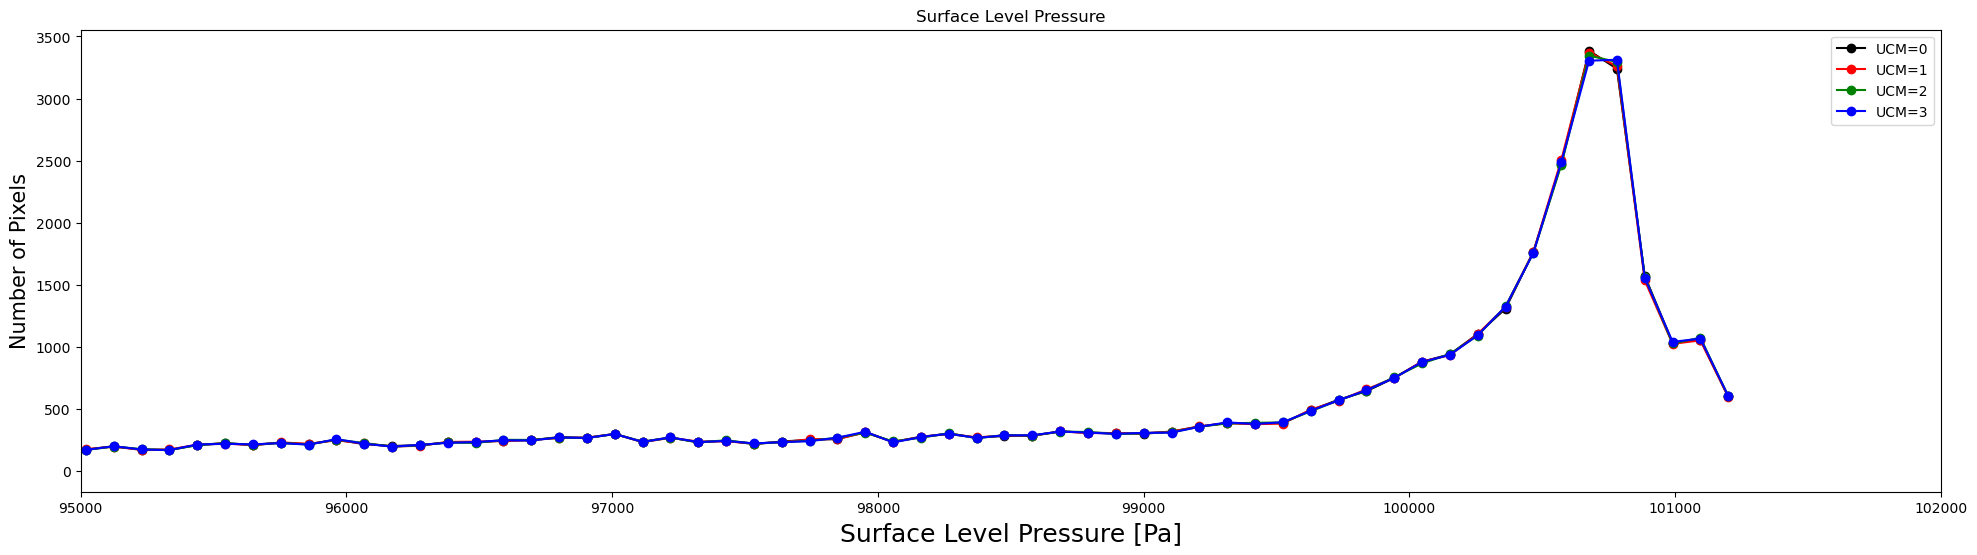

In [5]:
Var0 = getvar(ncfile0, "PSFC")
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
Var3 = getvar(ncfile3, "PSFC")

# Setting up the figure
plt.figure(figsize=(24, 6))
plt.title("Surface Level Pressure")
plt.xlabel("Surface Level Pressure [Pa]", fontsize=18)
plt.ylabel("Number of Pixels", fontsize=15)

# Histogramming
count0, bin_edges = np.histogram(to_np(Var0).flatten(), bins=200)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
plt.plot(bin_centers, count0, color='k', marker='o', linestyle='-', label="UCM=0")

# Histogramming
count1, _ = np.histogram(to_np(Var1).flatten(), bins=bin_edges)
plt.plot(bin_centers, count1, color='r', marker='o', linestyle='-', label="UCM=1")


# Histogramming
count2, _ = np.histogram(to_np(Var2).flatten(), bins=bin_edges)
plt.plot(bin_centers, count2, color='g', marker='o', linestyle='-', label="UCM=2")

# Histogramming
count3, _ = np.histogram(to_np(Var3).flatten(), bins=bin_edges)
plt.plot(bin_centers, count3, color='b', marker='o', linestyle='-', label="UCM=3")

# Plotting Options
#plt.yscale('log')
#plt.ylim(3000,250_000)
plt.xlim(95_000,102_000)
plt.legend()
plt.show()

### Surface Pressure Difference between the two models, where UCM = 0 is always the baseline.

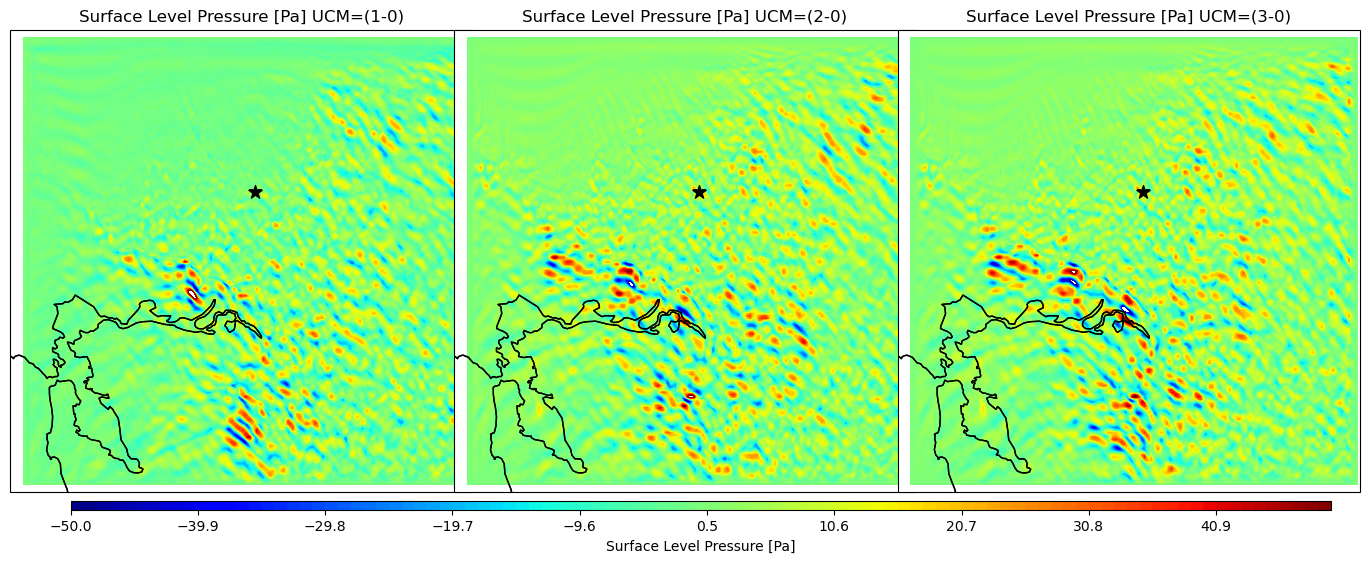

In [7]:
Var0 = getvar(ncfile0, "PSFC")
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
Var3 = getvar(ncfile3, "PSFC")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-50, 50, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Surface Level Pressure [Pa] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Surface Level Pressure [Pa] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Surface Level Pressure [Pa] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

### Wind Speed at 10-m.

In [8]:
Var0 = getvar(ncfile0, "wspd10")
Var1 = getvar(ncfile1, "wspd10")
Var2 = getvar(ncfile2, "wspd10")
Var3 = getvar(ncfile3, "wspd10")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(),  to_np(Var2).max()), to_np(Var3.max())) #max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Wind Speed at 10-m [m/s] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Wind Speed at 10-m [m/s] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Wind Speed at 10-m [m/s]UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Wind Speed at 10-m [m/s] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Wind Speed at 10-m [m/s]")

plt.show()

In [9]:
Var0 = getvar(ncfile0, "wspd10")
Var1 = getvar(ncfile1, "wspd10")
Var2 = getvar(ncfile2, "wspd10")
Var3 = getvar(ncfile3, "wspd10")

# Setting up the figure
plt.figure(figsize=(24, 6))
plt.title("Wind Speed [m/s] histogram")
plt.xlabel("Wind Speed [m/s]", fontsize=18)
plt.ylabel("Number of Pixels", fontsize=15)

# Histogramming
count0, bin_edges = np.histogram(to_np(Var0).flatten(), bins=100)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
plt.plot(bin_centers, count0, color='k', marker='o', linestyle='-', label="UCM=0")

# Histogramming
count1, _ = np.histogram(to_np(Var1).flatten(), bins=bin_edges)
plt.plot(bin_centers, count1, color='r', marker='o', linestyle='-', label="UCM=1")


# Histogramming
count2, _ = np.histogram(to_np(Var2).flatten(), bins=bin_edges)
plt.plot(bin_centers, count2, color='g', marker='o', linestyle='-', label="UCM=2")

# Histogramming
count3, _ = np.histogram(to_np(Var3).flatten(), bins=bin_edges)
plt.plot(bin_centers, count3, color='b', marker='o', linestyle='-', label="UCM=3")

# Plotting Options
#plt.yscale('log')
#plt.ylim(3000,250_000)
plt.legend()
plt.show()

In [10]:
Var0 = getvar(ncfile0, "wspd10")
Var1 = getvar(ncfile1, "wspd10")
Var2 = getvar(ncfile2, "wspd10")
Var3 = getvar(ncfile3, "wspd10")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-3, 3, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Wind Speed at 10-m [m/s]UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Wind Speed at 10-m [m/s] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Wind Speed at 10-m [m/s] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Wind Speed at 10-m [m/s]")

plt.show()

### Relative Humidity at 2m

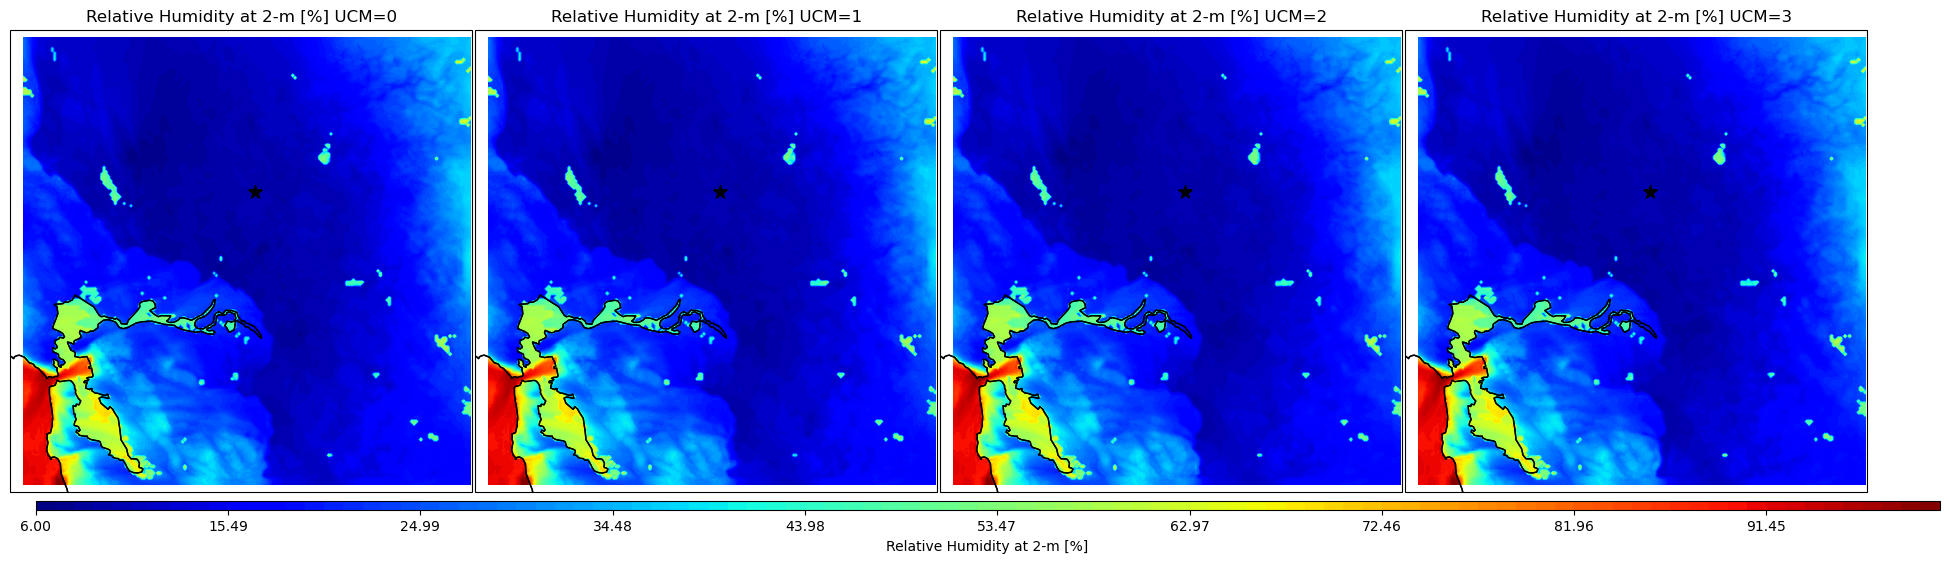

In [11]:
Var0 = getvar(ncfile0, "rh2")
Var1 = getvar(ncfile1, "rh2")
Var2 = getvar(ncfile2, "rh2")
Var3 = getvar(ncfile3, "rh2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(),  to_np(Var2).max()), to_np(Var3.max())) #max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Relative Humidity at 2-m [%] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Relative Humidity at 2-m [%] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Relative Humidity at 2-m [%] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Relative Humidity at 2-m [%] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Relative Humidity at 2-m [%]")

plt.show()

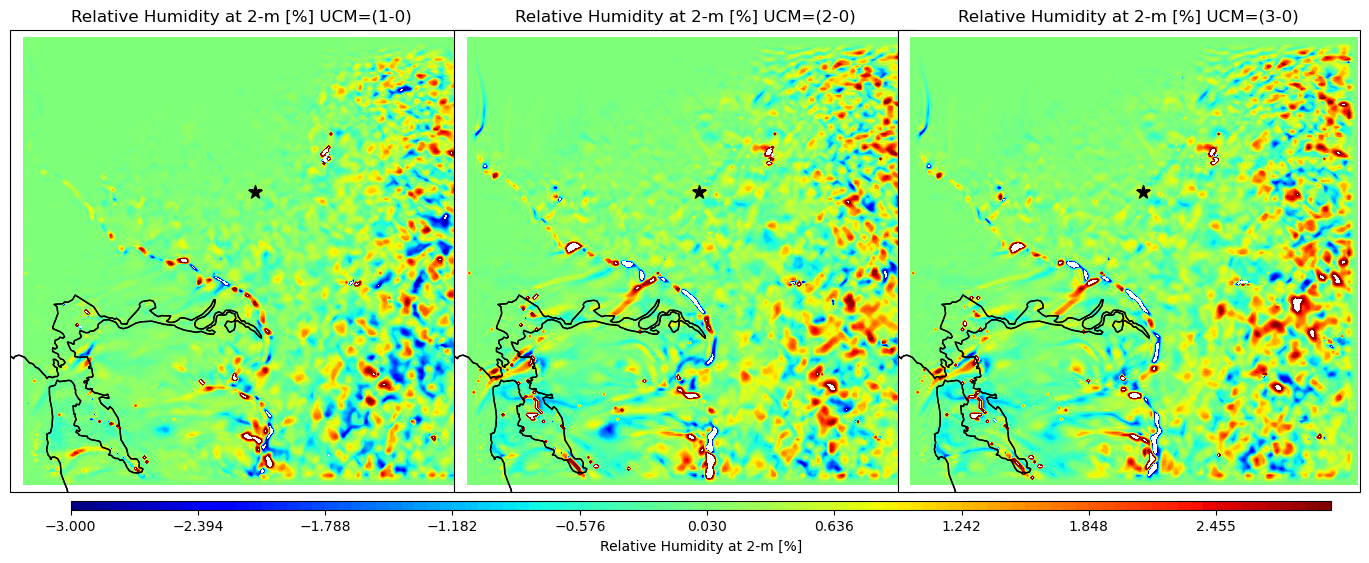

In [12]:
Var0 = getvar(ncfile0, "rh2")
Var1 = getvar(ncfile1, "rh2")
Var2 = getvar(ncfile2, "rh2")
Var3 = getvar(ncfile3, "rh2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-3, 3, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Relative Humidity at 2-m [%] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Relative Humidity at 2-m [%] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Relative Humidity at 2-m [%] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Relative Humidity at 2-m [%]")

plt.show()

### Ground Heat Flux

In [13]:
Var0 = getvar(ncfile0, "GRDFLX")
Var1 = getvar(ncfile1, "GRDFLX")
Var2 = getvar(ncfile2, "GRDFLX")
Var3 = getvar(ncfile3, "GRDFLX")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(),  to_np(Var2).max()), to_np(Var3.max())) #max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Ground Heat Flux [Watt/m^2] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Ground Heat Flux [Watt/m^2] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Ground Heat Flux [Watt/m^2] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Ground Heat Flux [Watt/m^2] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Ground Heat Flux [Watt/m^2]")

plt.show()

In [2]:
Var0 = getvar(ncfile0, "GRDFLX")
Var1 = getvar(ncfile1, "GRDFLX")
Var2 = getvar(ncfile2, "GRDFLX")
Var3 = getvar(ncfile3, "GRDFLX")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-10, 10, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Ground Heat Flux [Watt/m^2] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Ground Heat Flux [Watt/m^2] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Ground Heat Flux [Watt/m^2] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Ground Heat Flux [Watt/m^2]")

plt.show()

### Latent Heat Flux at SFC

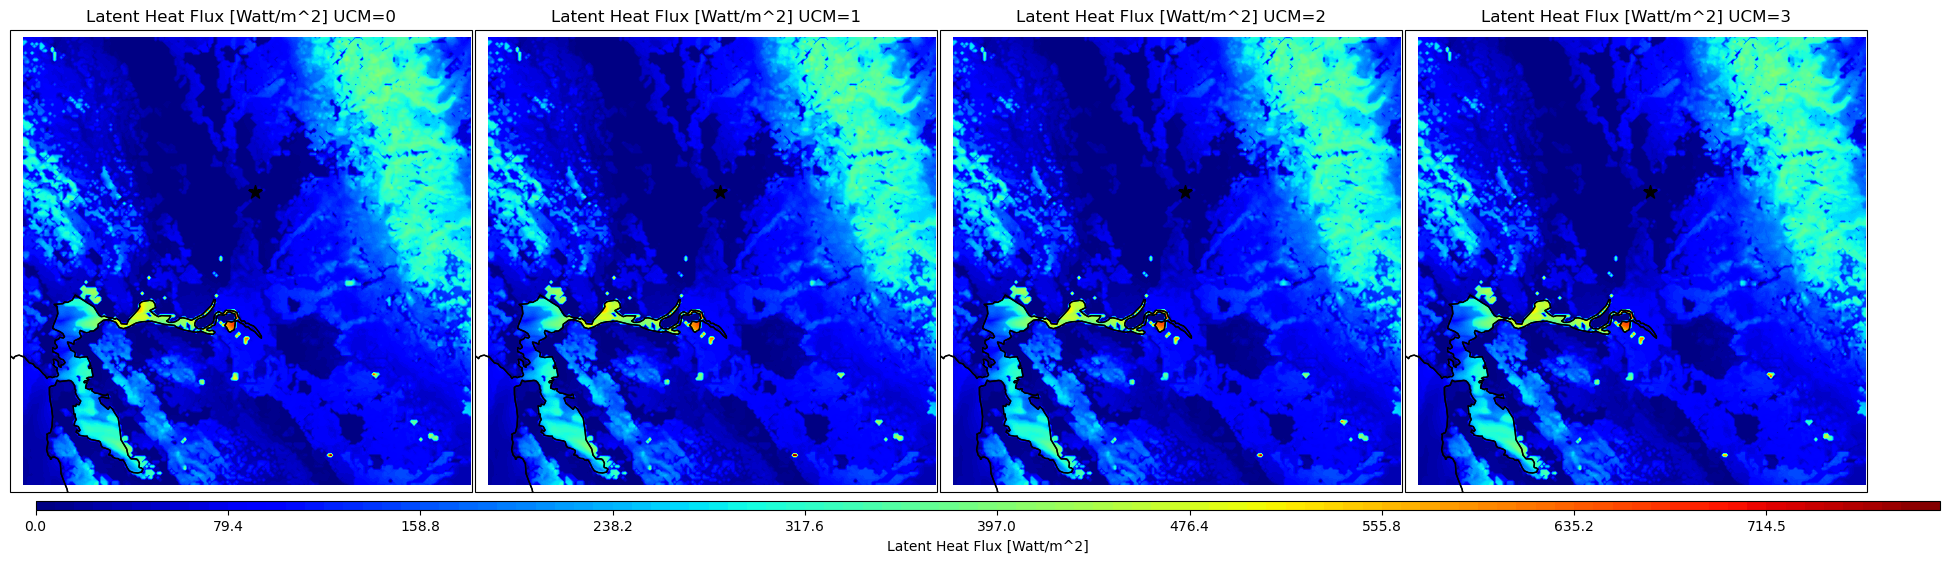

In [3]:
Var0 = getvar(ncfile0, "LH")
Var1 = getvar(ncfile1, "LH")
Var2 = getvar(ncfile2, "LH")
Var3 = getvar(ncfile3, "LH")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(),  to_np(Var2).max()), to_np(Var3.max())) #max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Latent Heat Flux [Watt/m^2] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Latent Heat Flux [Watt/m^2] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Latent Heat Flux [Watt/m^2] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Latent Heat Flux [Watt/m^2] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Latent Heat Flux [Watt/m^2]")

plt.show()

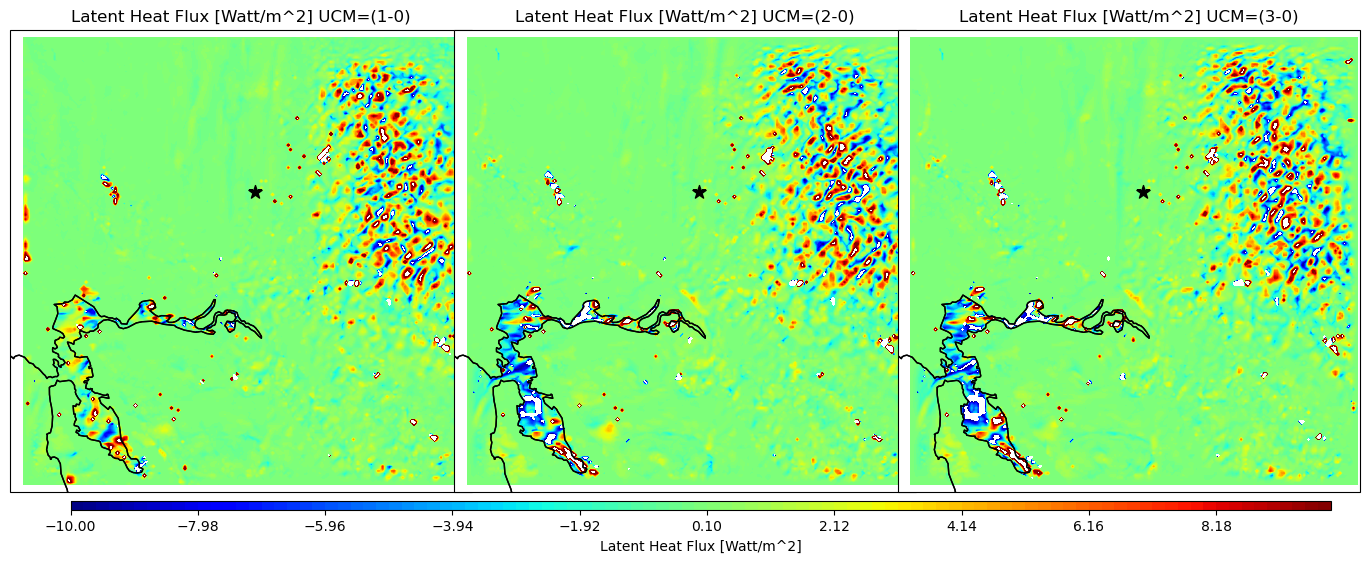

In [4]:
Var0 = getvar(ncfile0, "LH")
Var1 = getvar(ncfile1, "LH")
Var2 = getvar(ncfile2, "LH")
Var3 = getvar(ncfile3, "LH")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-10, 10, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Latent Heat Flux [Watt/m^2] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Latent Heat Flux [Watt/m^2] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Latent Heat Flux [Watt/m^2] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Latent Heat Flux [Watt/m^2]")

plt.show()

## End of Script